In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model_data = pd.read_csv("../przygotowanie_danych/model_data.csv")
X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine", "day_number_in_year"]]
y = model_data['PM2.5']
model_data


,Unnamed: 0,stacja,rok,miesiąc,dzień,temperatura,suma opadów,wilgotność,prędkość wiatru,zachmurzenine,day_number_in_year,PM2.5
0,0,KRAKÓW-OBSERWATORIUM,2014,1,1,0.3,0.0,94.5,0.7,7.3,1,94.0
1,1,KRAKÓW-OBSERWATORIUM,2014,1,2,-1.5,0.0,89.5,1.0,4.3,2,135.0
2,2,KRAKÓW-OBSERWATORIUM,2014,1,3,2.0,0.0,88.5,0.3,1.7,3,172.0
3,3,KRAKÓW-OBSERWATORIUM,2014,1,4,2.7,1.7,88.5,0.3,6.0,4,135.0
4,4,KRAKÓW-OBSERWATORIUM,2014,1,5,7.0,0.9,87.8,0.7,7.0,5,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3482,3525,KRAKÓW-OBSERWATORIUM,2023,8,27,22.2,0.5,85.3,0.7,3.7,239,9.9
3483,3526,KRAKÓW-OBSERWATORIUM,2023,8,28,19.7,0.1,89.5,1.7,8.0,240,8.4
3484,3527,KRAKÓW-OBSERWATORIUM,2023,8,29,21.0,0.9,89.0,1.0,7.7,241,10.2
3485,3528,KRAKÓW-OBSERWATORIUM,2023,8,30,18.5,0.3,89.5,1.3,7.7,242,8.4


In [21]:

model_data_test = pd.read_csv("../przygotowanie_danych/model_data_test.csv")
model_data_test.index = pd.RangeIndex(start=3487, stop=3517, step=1)
model_data_test
X_test = model_data_test[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine", "day_number_in_year"]]
y_test = model_data_test['PM2.5']
model_data_test


,Unnamed: 0,stacja,rok,miesiąc,dzień,temperatura,suma opadów,wilgotność,prędkość wiatru,zachmurzenine,day_number_in_year,PM2.5
3487,3895,KRAKÓW-OBSERWATORIUM,2023,9,1,16.6,24.7,70.8,1.7,4.3,244,9.1
3488,3896,KRAKÓW-OBSERWATORIUM,2023,9,2,18.5,5.7,86.8,1.0,6.7,245,10.3
3489,3897,KRAKÓW-OBSERWATORIUM,2023,9,3,17.5,1.6,80.5,1.0,5.7,246,12.4
3490,3898,KRAKÓW-OBSERWATORIUM,2023,9,4,16.5,0.0,79.8,1.3,4.0,247,12.5
3491,3899,KRAKÓW-OBSERWATORIUM,2023,9,5,16.6,0.0,72.3,1.0,1.0,248,15.8
3492,3900,KRAKÓW-OBSERWATORIUM,2023,9,6,16.7,0.0,75.8,1.0,0.0,249,17.8
3493,3901,KRAKÓW-OBSERWATORIUM,2023,9,7,17.2,0.0,79.5,1.3,1.0,250,23.0
3494,3902,KRAKÓW-OBSERWATORIUM,2023,9,8,18.5,0.0,80.0,1.3,1.0,251,21.4
3495,3903,KRAKÓW-OBSERWATORIUM,2023,9,9,18.5,0.0,78.8,1.0,3.7,252,24.0
3496,3904,KRAKÓW-OBSERWATORIUM,2023,9,10,20.2,0.0,76.8,1.0,0.7,253,22.5


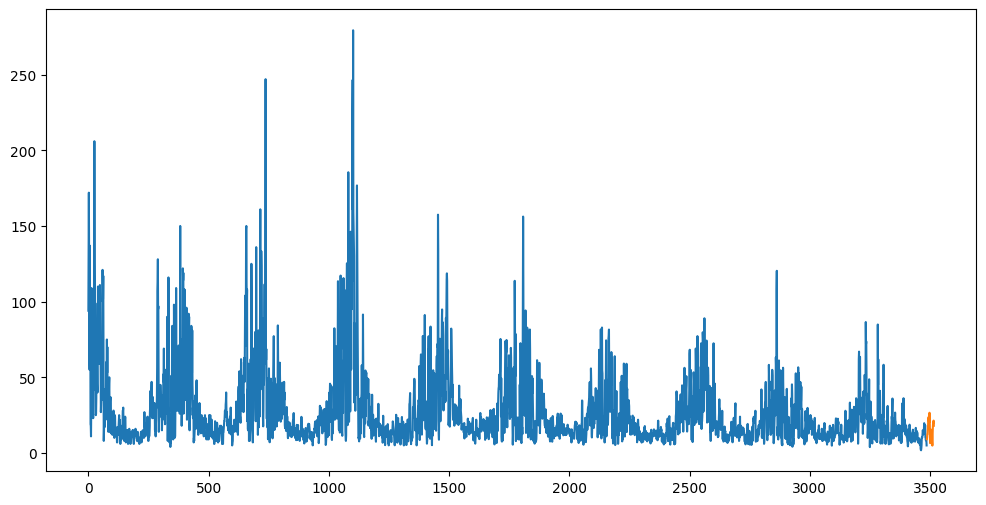

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(y)
plt.plot(y_test)
plt.show()